In [26]:
!pip install mplsoccer statsbombpy
from mplsoccer import (VerticalPitch, Pitch, create_transparent_cmap,
                       FontManager, arrowhead_marker, Sbopen)
import statsbombpy
from statsbombpy import sb
import numpy as np
from matplotlib import colormaps
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [29]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(3943043)

# subset the barcelona shots
df_shots_spain = df[(df.type_name == 'Shot') & (df.team_name == 'Spain')].copy()
# subset the barca open play passes
df_pass_spain = df[(df.type_name == 'Pass') &
                   (df.team_name == 'Spain') &
                   (~df.sub_type_name.isin(['Throw-in', 'Corner', 'Free Kick', 'Kick Off']))].copy()

# setup a mplsoccer FontManager to download google fonts (SigmarOne-Regular)
fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/'
                       'rubikmonoone/RubikMonoOne-Regular.ttf')


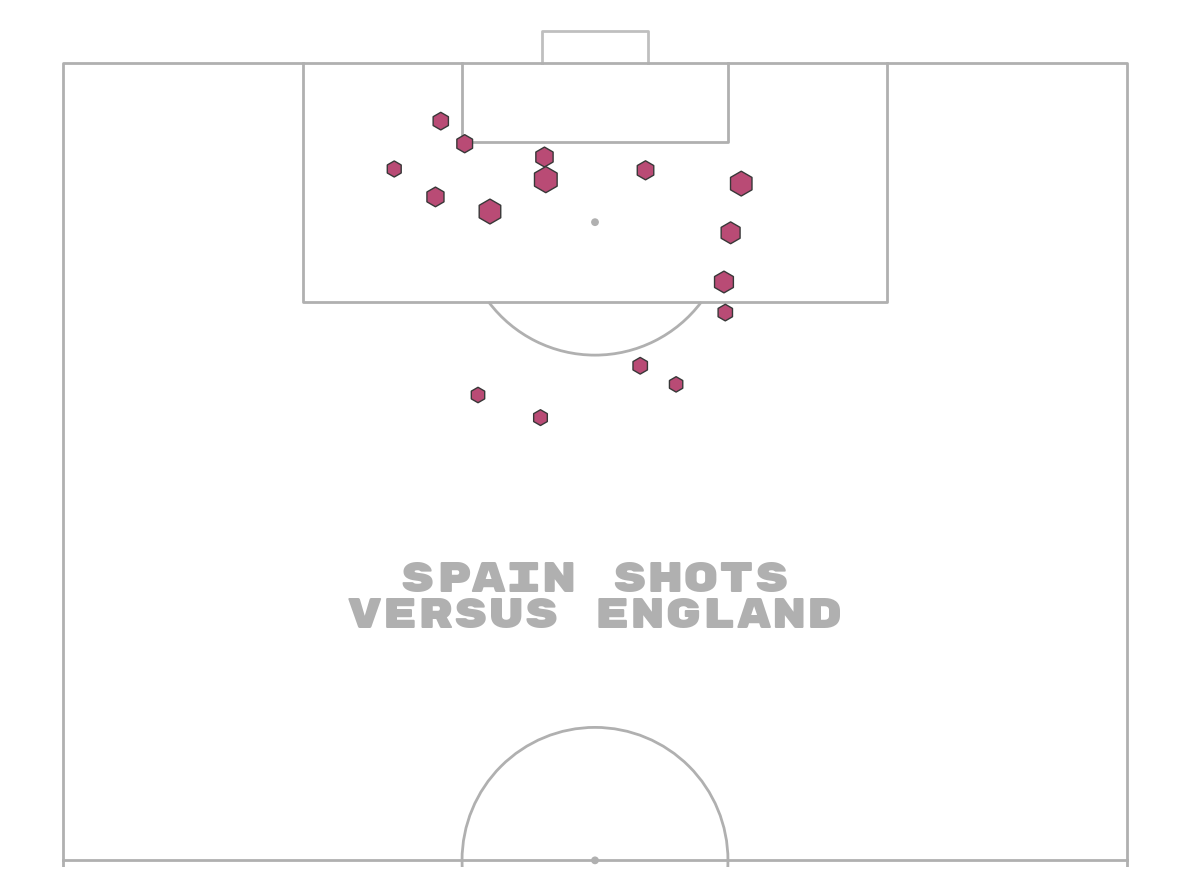

In [30]:
pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8)  # control the goal transparency
fig, ax = pitch.draw(figsize=(12, 10))
sc = pitch.scatter(df_shots_spain.x, df_shots_spain.y,
                   # size varies between 100 and 1000 (points squared)
                   s=(df_shots_spain.shot_statsbomb_xg * 900) + 100,
                   c='#b94b75',  # color for scatter in hex format
                   edgecolors='#383838',  # give the markers a charcoal border
                   # for other markers types see: https://matplotlib.org/api/markers_api.html
                   marker='h',
                   ax=ax)
txt = ax.text(x=40, y=80, s='Spain shots\nversus England',
              size=30,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties=fm_rubik.prop, color=pitch.line_color,
              va='center', ha='center')


In [18]:
# An alternative is to use colors to represent the quality of shots.
#  In this example, we will also pass the expected goals to the c argument and use a matplotlib colormap to map the expected goals to colors

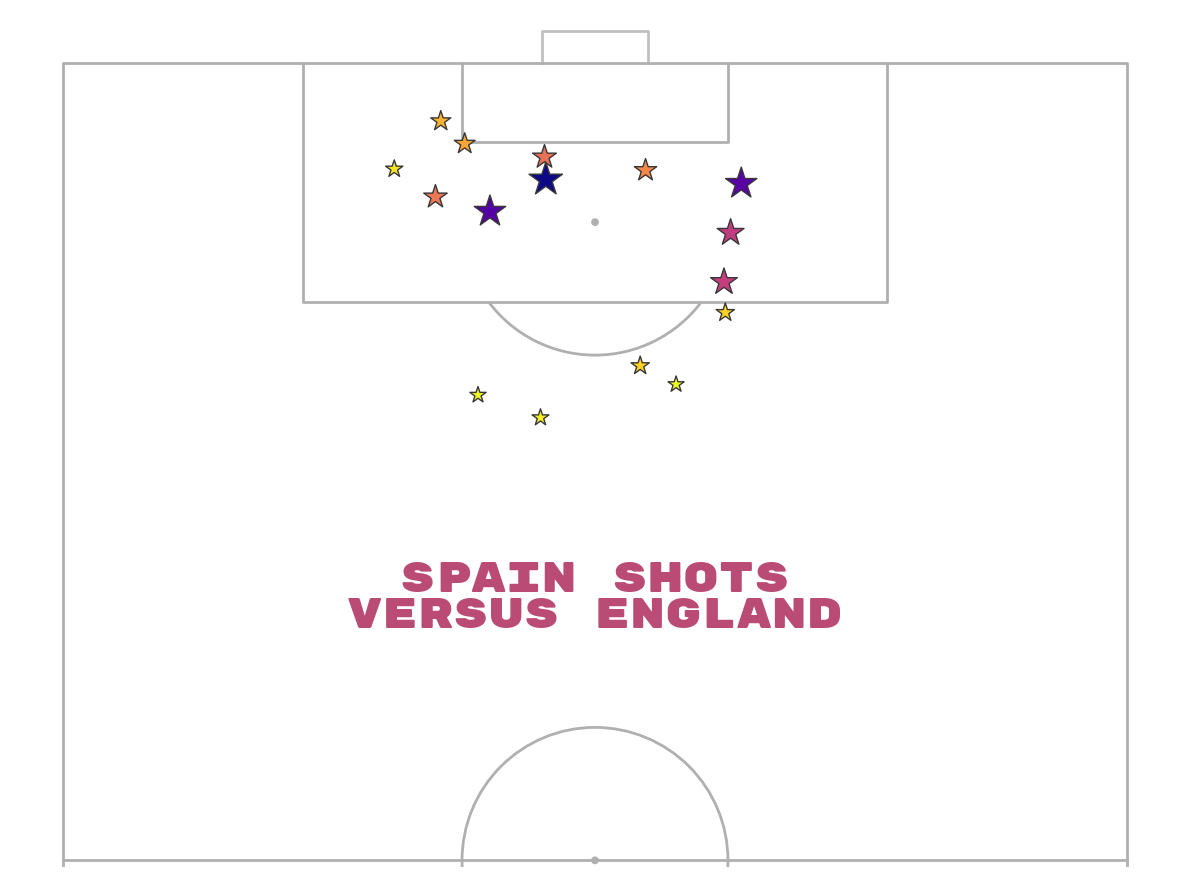

In [31]:
fig, ax = pitch.draw(figsize=(12, 10))
sc = pitch.scatter(df_shots_spain.x, df_shots_spain.y,
                   # size varies between 100 and 1900 (points squared)
                   s=(df_shots_spain.shot_statsbomb_xg * 1900) + 100,
                   cmap='plasma_r',  # reverse magma colormap so darker = higher expected goals
                   edgecolors='#383838',  # give the markers a charcoal border
                   c=df_shots_spain.shot_statsbomb_xg,  # color for scatter in hex format
                   # for other markers types see: https://matplotlib.org/api/markers_api.html
                   marker='*',
                   ax=ax)
txt = ax.text(x=40, y=80, s='Spain shots\nversus England',
              size=30,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties=fm_rubik.prop, color='#b94b75',
              va='center', ha='center')
# comment below sets this as the thumbnail in the docs
# sphinx_gallery_thumbnail_path = 'gallery/pitch_plots/images/sphx_glr_plot_scatter_002'

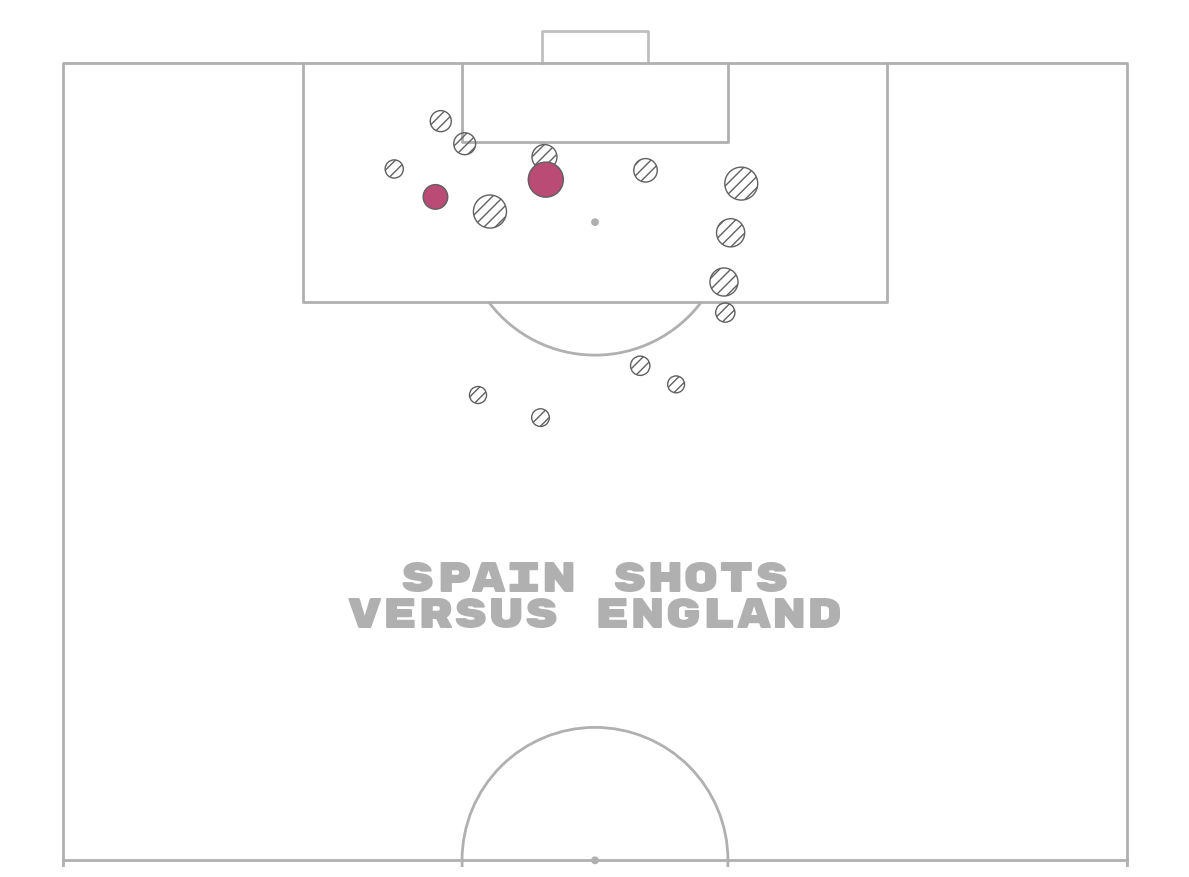

In [32]:
# filter goals / non-shot goals
df_goals_spain = df_shots_spain[df_shots_spain.outcome_name == 'Goal'].copy()
df_non_goal_shots_spain = df_shots_spain[df_shots_spain.outcome_name != 'Goal'].copy()

fig, ax = pitch.draw(figsize=(12, 10))

# plot non-goal shots with hatch
sc1 = pitch.scatter(df_non_goal_shots_spain.x, df_non_goal_shots_spain.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_non_goal_shots_spain.shot_statsbomb_xg * 1900) + 100,
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='None',  # no facecolor for the markers
                    hatch='///',  # the all important hatch (triple diagonal lines)
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='o',
                    ax=ax)

# plot goal shots with a color
sc2 = pitch.scatter(df_goals_spain.x, df_goals_spain.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_spain.shot_statsbomb_xg * 1900) + 100,
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='#b94b75',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='o',
                    ax=ax)

txt = ax.text(x=40, y=80, s='Spain shots\nversus England',
              size=30,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties=fm_rubik.prop, color=pitch.line_color,
              va='center', ha='center')


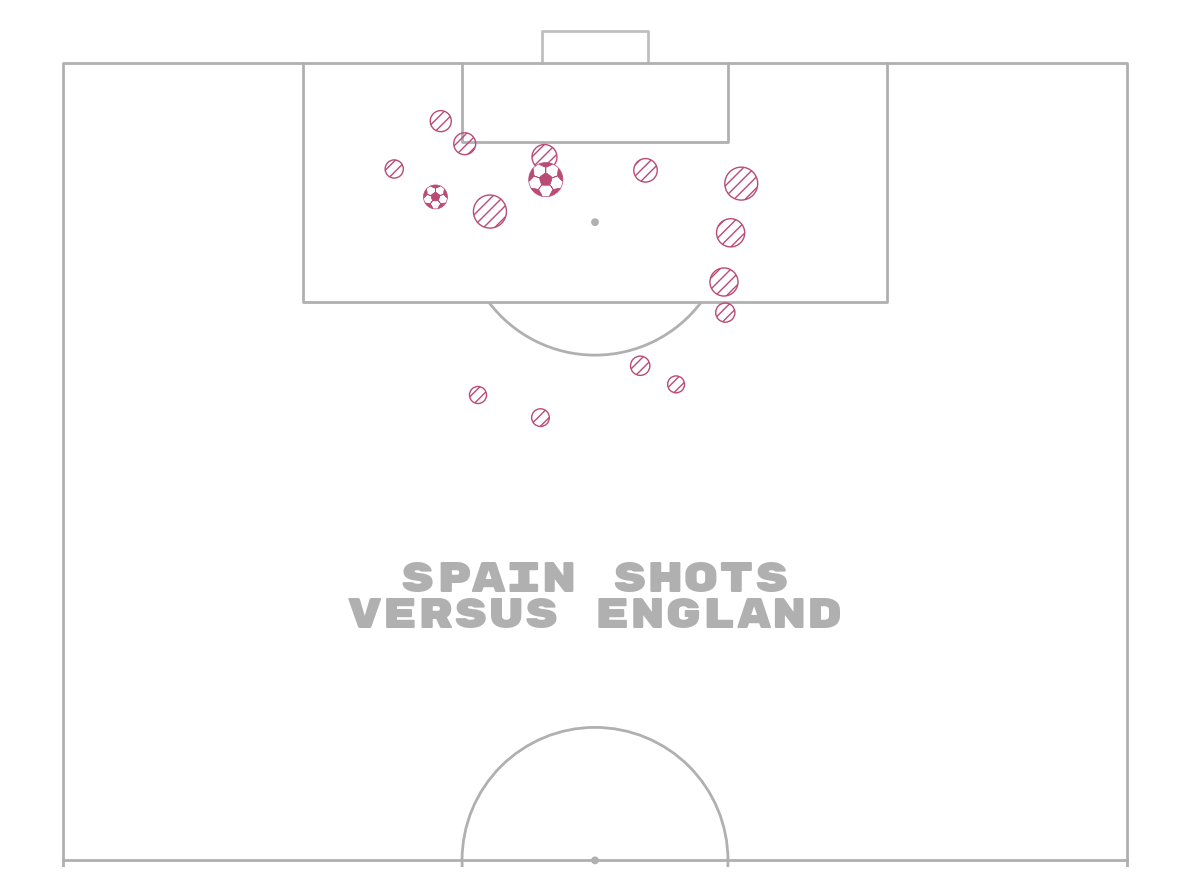

In [37]:
# filter goals / non-shot goals
df_goals_spain = df_shots_spain[df_shots_spain.outcome_name == 'Goal'].copy()
df_non_goal_shots_spain = df_shots_spain[df_shots_spain.outcome_name != 'Goal'].copy()

fig, ax = pitch.draw(figsize=(12, 10))

# plot non-goal shots with hatch
sc1 = pitch.scatter(df_non_goal_shots_spain.x, df_non_goal_shots_spain.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_non_goal_shots_spain.shot_statsbomb_xg * 1900) + 100,
                    edgecolors='#b94b75',  # give the markers a charcoal border
                    c='None',  # no facecolor for the markers
                    hatch='///',  # the all important hatch (triple diagonal lines)
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='o',
                    ax=ax)

# plot goal shots with a color
sc2 = pitch.scatter(df_goals_spain.x, df_goals_spain.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_spain.shot_statsbomb_xg * 1900) + 100,
                    edgecolors='#b94b75',  # give the markers a charcoal border
                    c='white',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='football',
                    ax=ax)

txt = ax.text(x=40, y=80, s='Spain shots\nversus England',
              size=30,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties=fm_rubik.prop, color=pitch.line_color,
              va='center', ha='center')
